In [9]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from DeepCor_utils import *

numpy version: 1.20.1
sklearn version: 1.3.2
torch version: 2.4.1+cu121
AntsPy version: 0.6.1


In [79]:
s = 2
r = 1

In [80]:
indir = '../Data/things/fmriprep2'
subs_orig = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs_orig.sort()
print(f'{s+1}/{len(subs_orig)}')
n_orig = len(subs_orig)
sub = subs_orig[s]
sub

3/3


'sub-03'

In [81]:
sess_name = 'ses-localizer2' if sub=='sub-01' else 'ses-localizer1'
sess_name

'ses-localizer1'

In [82]:
epi_fn = os.path.join(indir,sub,sess_name,'func',f'{sub}_{sess_name}_task-6cat_run-{r:02d}_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz')
anat_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz')
anat_gm_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-GM_probseg.nii.gz')
anat_wm_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-WM_probseg.nii.gz')
anat_csf_fn = os.path.join(indir,sub,'anat',f'{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-CSF_probseg.nii.gz')
conf_fn = os.path.join(indir,sub,sess_name,'func',f'{sub}_{sess_name}_task-6cat_run-{r:02d}_desc-confounds_timeseries.tsv')
events_fn = f'../Data/things/ds004192/{sub}/{sess_name}/func/{sub}_{sess_name}_task-6cat_run-{r:02d}_events.tsv'

In [83]:
df_conf = pd.read_csv(conf_fn,delimiter='\t')
epi = ants.image_read(epi_fn)

In [84]:
events_fn = os.path.join(events_fn)
X1 = get_design_matrix(epi,events_fn)
X1

,bodyparts,faces,objects,scenes,scrambled,words,drift_1,drift_2,drift_3,constant
0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.500000,0.165736,-0.049165,1.0
1.5,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.494413,0.160180,-0.045869,1.0
3.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.488827,0.154687,-0.042666,1.0
4.5,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.483240,0.149257,-0.039554,1.0
6.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.477654,0.143889,-0.036533,1.0
...,...,...,...,...,...,...,...,...,...,...
262.5,0.104316,0.0,0.0,0.0,0.0,-0.001637,0.477654,0.143889,0.036533,1.0
264.0,-0.049633,0.0,0.0,0.0,0.0,-0.000712,0.483240,0.149257,0.039554,1.0
265.5,-0.122492,0.0,0.0,0.0,0.0,-0.000256,0.488827,0.154687,0.042666,1.0
267.0,-0.143074,0.0,0.0,0.0,0.0,-0.000040,0.494413,0.160180,0.045869,1.0


In [85]:
#'../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-loc-v3-fixed-nopreclean/'
#'../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-loc-v4-fixed-scrub/'
#'../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-loc-v5-fixed-regress/'
#'../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-loc-v6-fixed-ScrubRegress/'

ofdir_root = '../Data/StudyForrest/ensembles_last_CVAE'
analysis_name = 'refactored-THINGS-loc-v5-fixed-regress'
#analysis_name = 'refactored-THINGS-loc-v3-fixed-nopreclean'
ofdir = os.path.join(ofdir_root,analysis_name)

In [86]:
# im_p = ants.image_read(os.path.join(ofdir,f'contrast_face_S{s}_R{r}_preproc.nii.gz'))
# im_c = ants.image_read(os.path.join(ofdir,f'contrast_face_S{s}_R{r}_compcor.nii.gz'))
# im_d = ants.image_read(os.path.join(ofdir,f'contrast_face_S{s}_R{r}_deepcor.nii.gz'))

In [87]:
roi_dir = '../Data/things/ROIs-indiv'
roi = ants.image_read(os.path.join(roi_dir,f'FFA-ROI-S{s}.nii'))
indiv_roi = roi.numpy()==1

In [88]:
signal = ants.image_read(os.path.join(ofdir,f'signal_S{s}_R{r}_avg.nii.gz'))

In [89]:
compcor = ants.image_read(os.path.join(ofdir,f'compcor_S{s}_R{r}.nii.gz'))

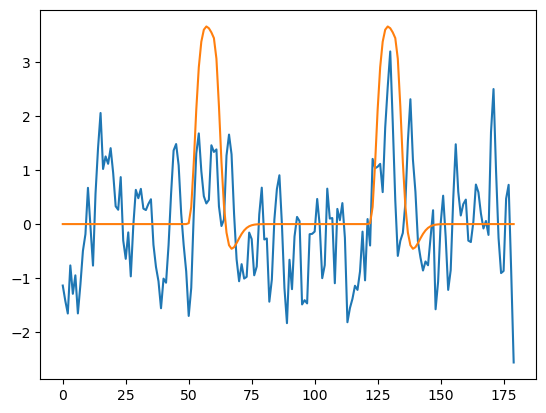

In [90]:
vec_roi = epi.numpy()[indiv_roi].mean(axis=0)
vec_roi = (vec_roi-vec_roi.mean())/vec_roi.std()
vec_reg = X1['faces'].values
plt.plot(vec_roi)
plt.plot(vec_reg*vec_roi.max())

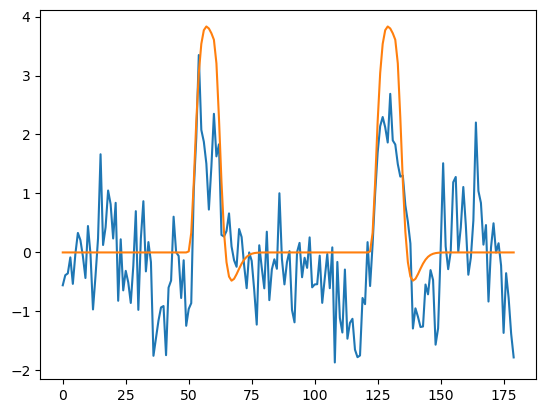

In [91]:
vec_roi = compcor.numpy()[indiv_roi].mean(axis=0)
vec_roi = (vec_roi-vec_roi.mean())/vec_roi.std()
vec_reg = X1['faces'].values
plt.plot(vec_roi)
plt.plot(vec_reg*vec_roi.max())

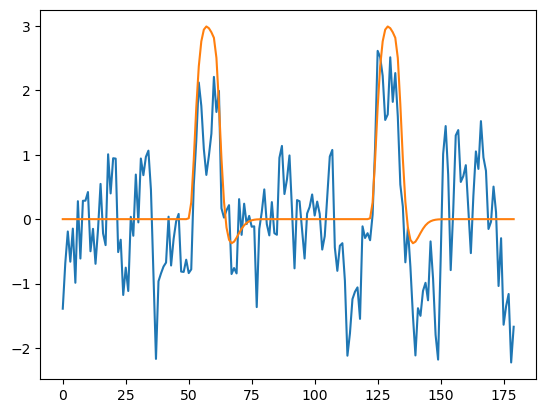

In [92]:
vec_roi = signal.numpy()[indiv_roi].mean(axis=0)
vec_roi = (vec_roi-vec_roi.mean())/vec_roi.std()
vec_reg = X1['faces'].values
plt.plot(vec_roi)
plt.plot(vec_reg*vec_roi.max())

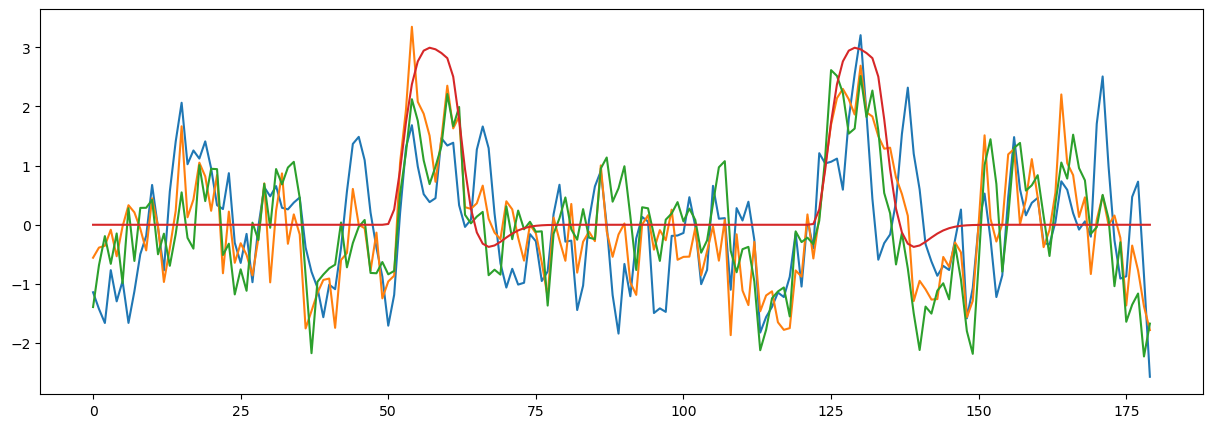

In [93]:
vec_roi1 = epi.numpy()[indiv_roi].mean(axis=0)
vec_roi2 = compcor.numpy()[indiv_roi].mean(axis=0)
vec_roi3 = signal.numpy()[indiv_roi].mean(axis=0)
vec_roi1 = (vec_roi1-vec_roi1.mean())/vec_roi1.std()
vec_roi2 = (vec_roi2-vec_roi2.mean())/vec_roi2.std()
vec_roi3 = (vec_roi3-vec_roi3.mean())/vec_roi3.std()
vec_reg = X1['faces'].values

plt.figure(figsize=(15,5))
plt.plot(vec_roi1)
plt.plot(vec_roi2)
plt.plot(vec_roi3)
plt.plot(vec_reg*vec_roi.max())